<a href="https://colab.research.google.com/github/esnue/ThesisAllocationSystem/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of CTM output results
In this notebook, we will visualize our CTM output. 

## Import what we need

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.colors as mcolors

## Data
Let's import the dataframe that holds all of the relevant CTM outputs for our corpus of academic papers. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
topics_df = pd.read_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label.csv')

print(topics_df.sample(10))

,prof,topic_id,topic,distribution
0,hammerschmid1,26,"['public', 'policy', 'countries', 'administrat...","[0.007617468922398984, 0.011387865972938015, 0..."
1,hammerschmid2,11,"['public', 'social', 'policy', 'actors', 'poli...","[0.02451734321657568, 0.016639157326426356, 0...."
2,hammerschmid3,8,"['enable', 'attempt', 'govern', 'existence', '...","[0.03584772520553088, 0.0016096520395052494, 0..."
3,hammerschmid4,26,"['public', 'policy', 'countries', 'administrat...","[0.011854977114126086, 0.023321411560755224, 0..."
4,hammerschmid5,26,"['public', 'policy', 'countries', 'administrat...","[0.009612670540809632, 0.015862242341972886, 0..."
...,...,...,...,...
806,wegrich2,19,"['political', 'public', 'media', 'information'...","[0.02860406127292663, 0.0381324146874249, 0.06..."
807,wegrich14,18,"['public', 'policy', 'political', 'government'...","[0.01629282342037186, 0.019298187928507106, 0...."
808,wegrich22,1,"['different', 'power', 'literature', 'effect',...","[0.02534038384910673, 0.09275465074460953, 0.0..."
809,wegrich19,26,"['public', 'policy', 'countries', 'administrat...","[0.02063450142159127, 0.019681045832112432, 0...."


KeyError: ignored

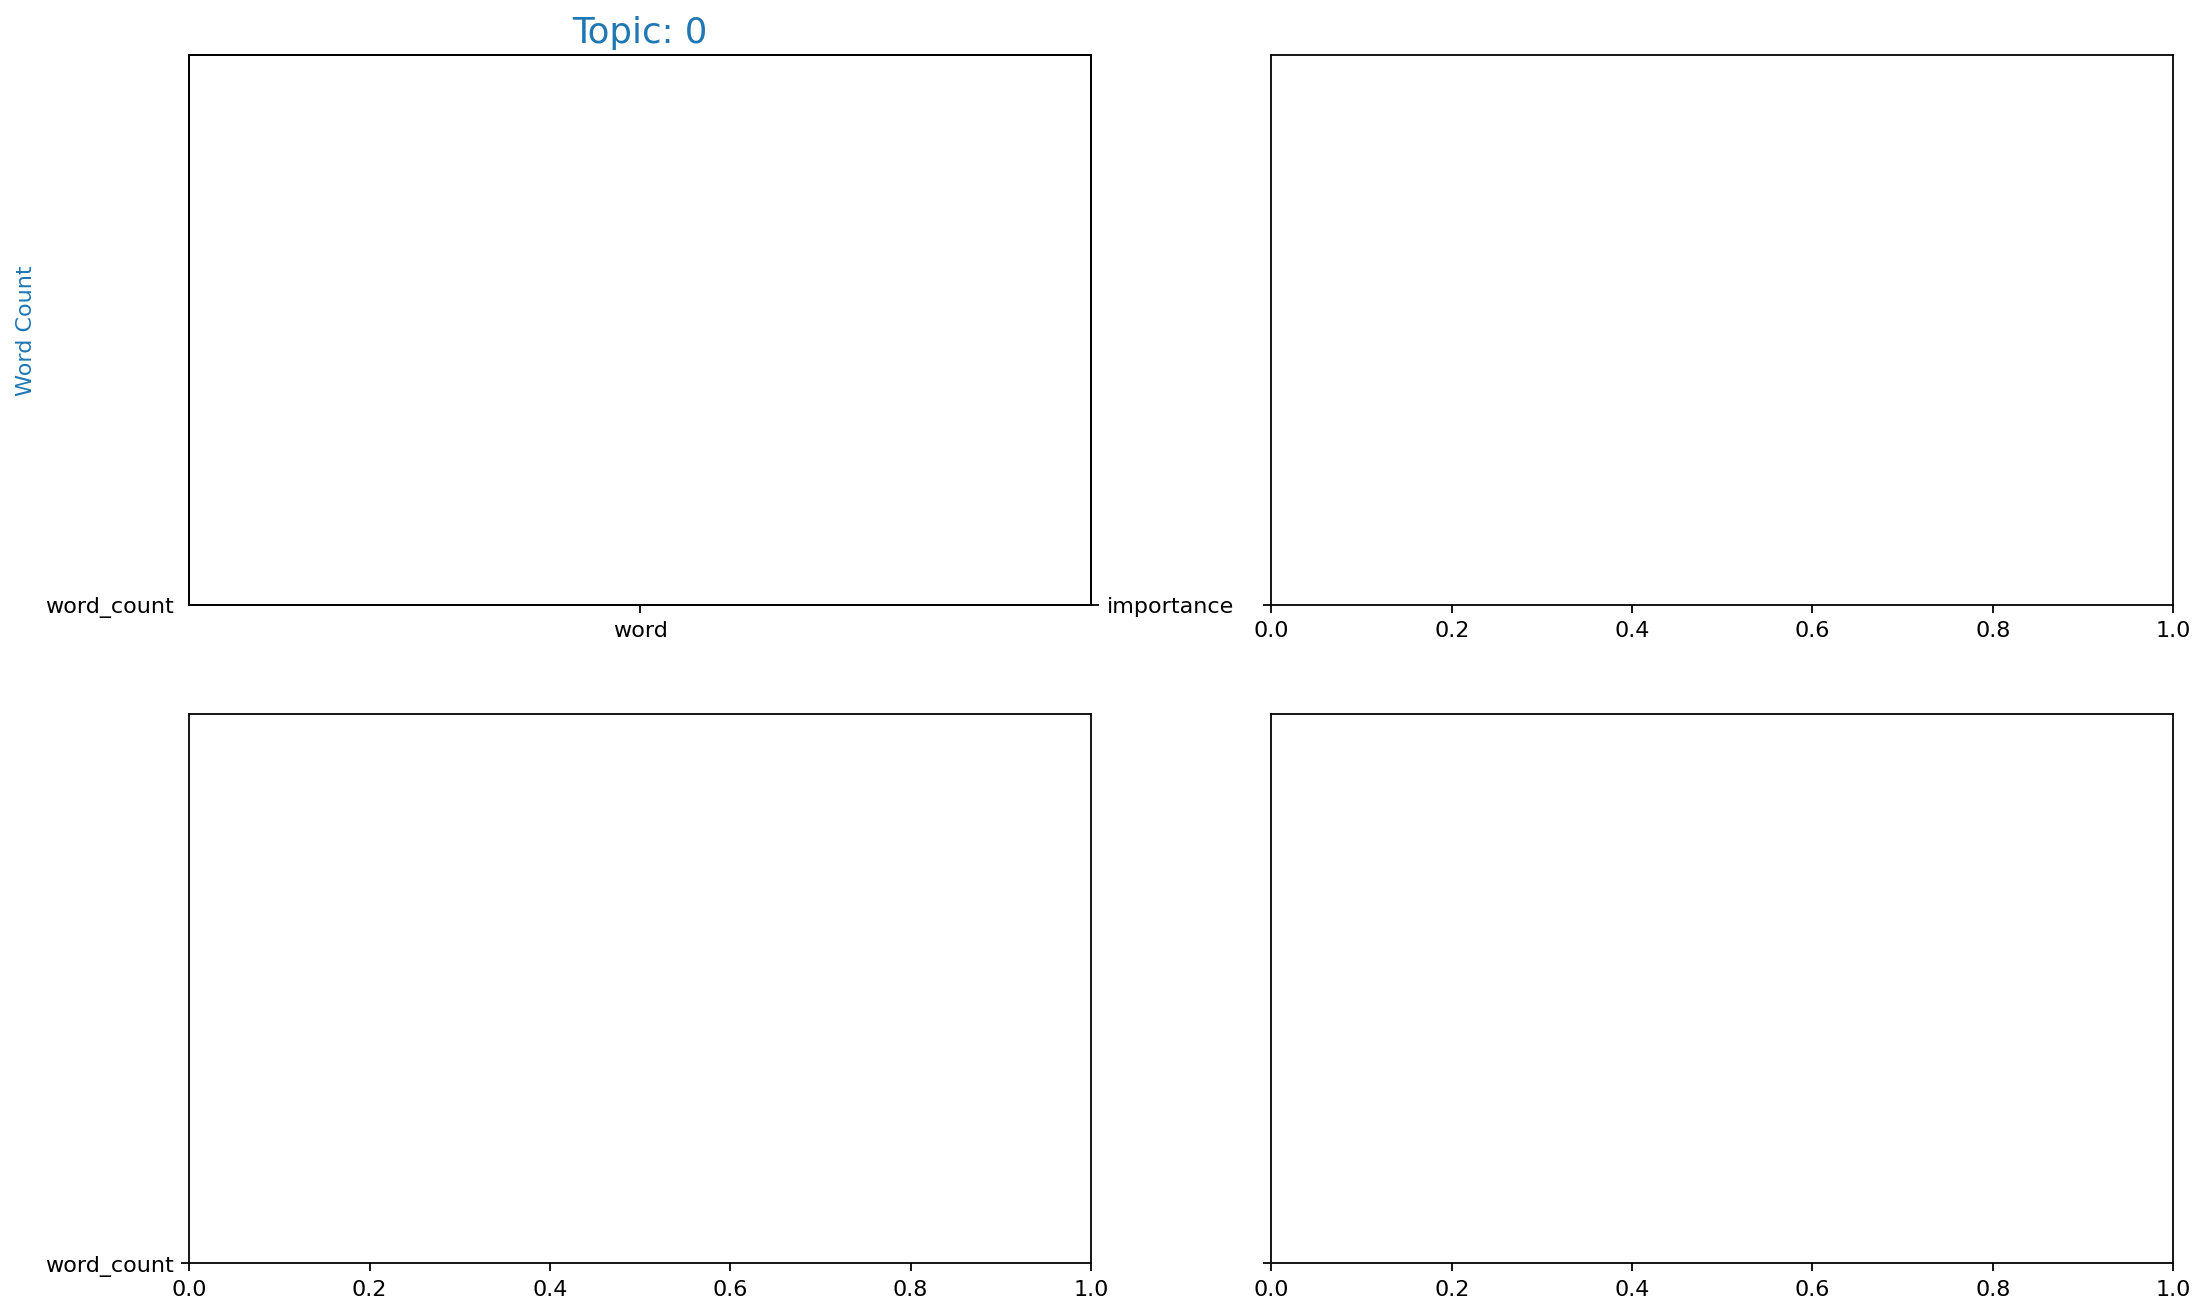

In [ ]:
#from: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=topics_df.loc[topics_df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=topics_df.loc[topics_df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(topics_df.loc[topics_df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

# Stacked Bar Chart

## Create wide format

In [4]:
import numpy as np
import pandas as pd

In [123]:
# Extract list of topic proportions 
list_prop = topics_df.iloc[:,3]

# Convert to float array
ar_float = np.array([[float(i) for i in j[1:-1].split(', ')] for j in list_prop])

# Create col labels 
topics = []
for i in list(range(0, 28)):
     topics.append('Topic' + str(i))

# Add col labels to float array
topiclab_df = pd.DataFrame(data = ar_float, columns=topics)
topiclab_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27
0,0.007617,0.011388,0.043832,0.014364,0.020481,0.006957,0.017882,0.005846,0.006433,0.105581,0.009290,0.027109,0.017887,0.063412,0.005752,0.032014,0.012873,0.033323,0.074364,0.102481,0.011663,0.081695,0.015003,0.004601,0.004648,0.007496,0.250168,0.005839
1,0.024517,0.016639,0.049658,0.013194,0.014712,0.019593,0.014759,0.009580,0.030882,0.024051,0.037934,0.107400,0.027896,0.042427,0.033954,0.025247,0.036476,0.019214,0.097950,0.099500,0.018998,0.037302,0.065800,0.018773,0.006648,0.016782,0.076794,0.013320
2,0.035848,0.001610,0.005467,0.005517,0.001657,0.037659,0.002507,0.092979,0.142037,0.028727,0.016458,0.004215,0.043899,0.001490,0.005473,0.010783,0.125345,0.012862,0.006455,0.001103,0.123404,0.004545,0.012896,0.046433,0.129222,0.049025,0.003912,0.048472
3,0.011855,0.023321,0.032876,0.021375,0.012057,0.010459,0.011519,0.011965,0.013303,0.088639,0.035930,0.040342,0.038739,0.048417,0.014271,0.019150,0.017844,0.020186,0.089197,0.089927,0.010183,0.077993,0.047796,0.003997,0.008492,0.008275,0.184336,0.007555
4,0.009613,0.015862,0.043615,0.009901,0.029389,0.010319,0.013241,0.008602,0.007651,0.042200,0.014387,0.031873,0.027205,0.021180,0.019408,0.034305,0.010615,0.022399,0.068203,0.127182,0.011444,0.052249,0.020590,0.007489,0.007830,0.011275,0.315658,0.006316
